In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datasets

In [2]:
vad_gold_df = pd.read_csv('data/Ratings_Warriner_et_al.csv', index_col=0)
vad_gold_df = vad_gold_df[['Word', 'V.Mean.Sum', 'A.Mean.Sum', 'D.Mean.Sum']]
print(vad_gold_df.shape)
vad_gold_df.head()

(13915, 4)


,Word,V.Mean.Sum,A.Mean.Sum,D.Mean.Sum
1,aardvark,6.26,2.41,4.27
2,abalone,5.30,2.65,4.95
3,abandon,2.84,3.73,3.32
4,abandonment,2.63,4.95,2.64
5,abbey,5.85,2.20,5.00


In [3]:
mean_ratings_df = pd.read_csv('lexica/mean_ratings/vad_eb_ratings.csv')
print(mean_ratings_df.shape)
mean_ratings_df.head()

(17314, 7)


,feat,avg(vad_eb.V),avg(vad_eb.A),avg(vad_eb.D),avg(vad_eb.V > 3),avg(vad_eb.A > 3),avg(vad_eb.D > 3)
0,!,3.191308,3.653972,3.242150,0.5935,0.9766,0.8037
1,"""",2.947384,3.081023,3.092206,0.3407,0.4804,0.5676
2,#,3.048333,2.825000,3.018333,0.5000,0.0000,0.3333
3,#118,2.500000,2.880000,2.880000,0.0000,0.0000,0.0000
4,#128,3.000000,2.700000,2.900000,0.0000,0.0000,0.0000


In [4]:
regression_V_df = pd.read_csv('lexica/regression_weights/dd_VLex.csv', index_col=0)
regression_V_df = regression_V_df[regression_V_df['term'] != '_intercept']
regression_V_df = regression_V_df[['term', 'weight']]
print(regression_V_df.shape)
regression_V_df.head()

(17314, 2)


,term,weight
id,,
1,remember,0.404901
2,what,0.204138
3,she,0.437373
4,said,-0.178460
5,in,0.153463


In [5]:
regression_A_df = pd.read_csv('lexica/regression_weights/dd_ALex.csv', index_col=0)
regression_A_df = regression_A_df[regression_A_df['term'] != '_intercept']
regression_V_df = regression_A_df[['term', 'weight']]
print(regression_A_df.shape)
regression_A_df.head()

(17314, 3)


,term,category,weight
id,,,
1,remember,A,-0.067515
2,what,A,0.229162
3,she,A,0.279720
4,said,A,-0.253638
5,in,A,-0.158744


In [6]:
regression_D_df = pd.read_csv('lexica/regression_weights/dd_DLex.csv', index_col=0)
regression_D_df = regression_D_df[regression_D_df['term'] != '_intercept']
regression_D_df = regression_D_df[['term', 'weight']]
print(regression_D_df.shape)
regression_D_df.head()

(17314, 2)


,term,weight
id,,
1,remember,0.063661
2,what,0.008771
3,she,-0.138049
4,said,0.138291
5,in,-0.013571


In [7]:
mixed_ffn_V_df = pd.read_csv('lexica/mixed_level_ffn/V_ratings.tsv', sep='\t', index_col=0)
print(mixed_ffn_V_df.shape)
mixed_ffn_V_df.head()

(15398, 2)


,tokens,ratings
0,fluted,3.020292
1,danger,2.606444
2,55,3.033551
3,speaking,2.647767
4,photo,3.438868


In [8]:
mixed_ffn_A_df = pd.read_csv('lexica/mixed_level_ffn/A_ratings.tsv', sep='\t', index_col=0)
print(mixed_ffn_A_df.shape)
mixed_ffn_A_df.head()

(15398, 2)


,tokens,ratings
0,fluted,2.916160
1,danger,3.331011
2,55,2.906806
3,speaking,3.141276
4,photo,2.919937


In [9]:
mixed_ffn_D_df = pd.read_csv('lexica/mixed_level_ffn/D_ratings.tsv', sep='\t', index_col=0)
print(mixed_ffn_D_df.shape)
mixed_ffn_D_df.head()

(15398, 2)


,tokens,ratings
0,fluted,3.050337
1,danger,2.974985
2,55,2.994373
3,speaking,3.012212
4,photo,3.059103


# Distributions

In [10]:
xlabel='Ratings'
ylabel='Counts'
bins=None

### Valence

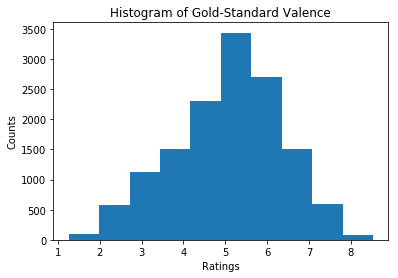

In [11]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Gold-Standard Valence')
plt.hist(vad_gold_df['V.Mean.Sum'], bins=bins);

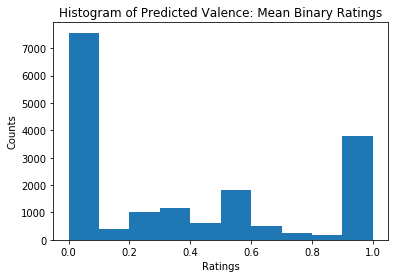

In [12]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Valence: Mean Binary Ratings')
plt.hist(mean_ratings_df['avg(vad_eb.V > 3)'], bins=bins);

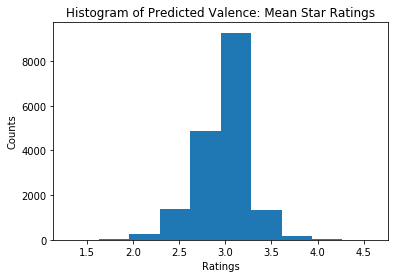

In [13]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Valence: Mean Star Ratings')
plt.hist(mean_ratings_df['avg(vad_eb.V)'], bins=bins);

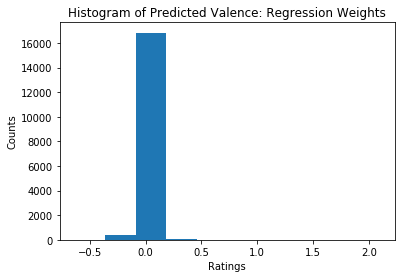

In [14]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Valence: Regression Weights')
plt.hist(regression_V_df['weight'], bins=bins);

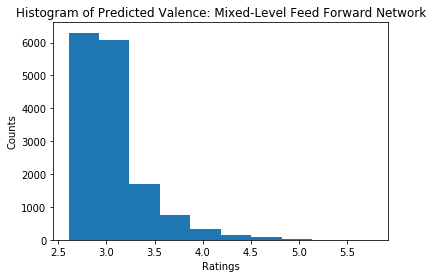

In [15]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Valence: Mixed-Level Feed Forward Network')
plt.hist(mixed_ffn_V_df['ratings'], bins=bins);

### Arousal

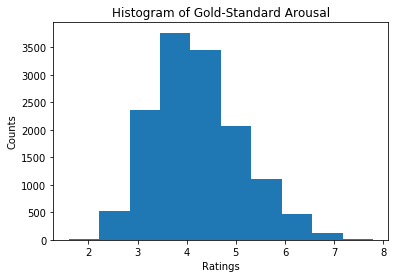

In [16]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Gold-Standard Arousal')
plt.hist(vad_gold_df['A.Mean.Sum'], bins=bins);

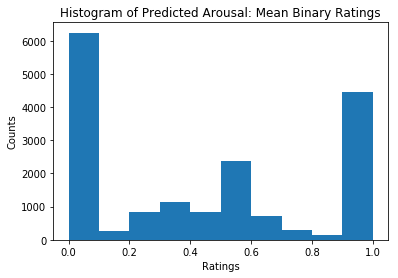

In [17]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Arousal: Mean Binary Ratings')
plt.hist(mean_ratings_df['avg(vad_eb.A > 3)']);

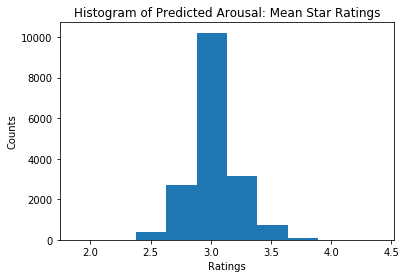

In [18]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Arousal: Mean Star Ratings')
plt.hist(mean_ratings_df['avg(vad_eb.A)']);

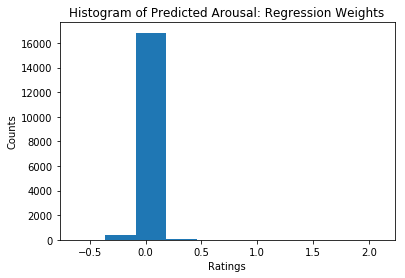

In [19]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Arousal: Regression Weights')
plt.hist(regression_A_df['weight'], bins=bins);

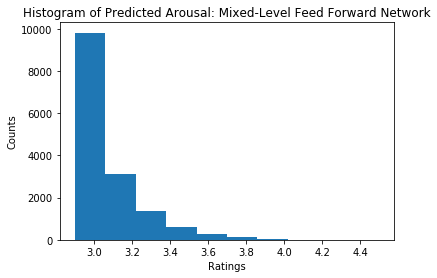

In [20]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Arousal: Mixed-Level Feed Forward Network')
plt.hist(mixed_ffn_A_df['ratings'], bins=bins);

### Dominance

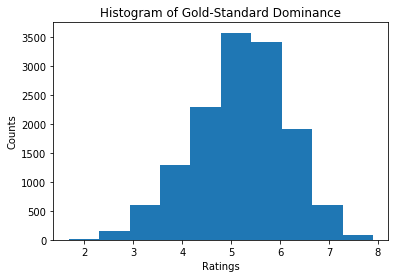

In [21]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Gold-Standard Dominance')
plt.hist(vad_gold_df['D.Mean.Sum']);

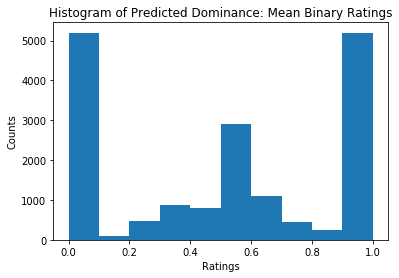

In [22]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Dominance: Mean Binary Ratings')
plt.hist(mean_ratings_df['avg(vad_eb.D > 3)']);

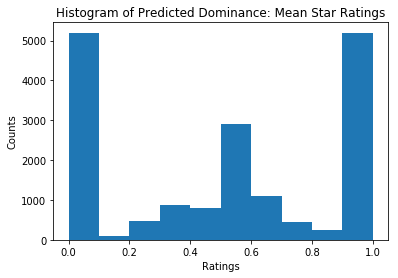

In [23]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Dominance: Mean Star Ratings')
plt.hist(mean_ratings_df['avg(vad_eb.D > 3)']);

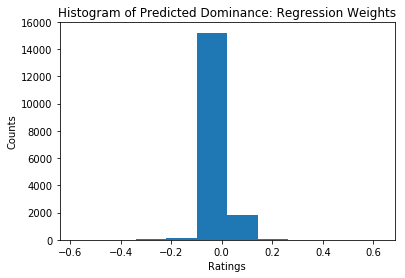

In [24]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Dominance: Regression Weights')
plt.hist(regression_D_df['weight'], bins=bins);

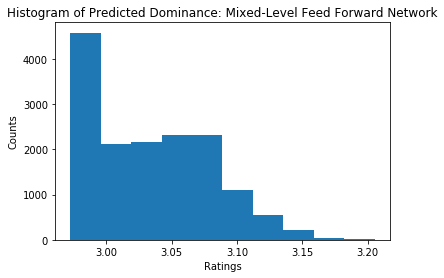

In [25]:
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Histogram of Predicted Dominance: Mixed-Level Feed Forward Network')
plt.hist(mixed_ffn_D_df['ratings'], bins=bins);

# Correlation

In [26]:
from scipy import stats as st

def correlation(true, pred):
    result=st.pearsonr(true,pred)
    return result[0]

correlations={}

In [27]:
merge_df = vad_gold_df.merge(mean_ratings_df, left_on='Word', right_on='feat')
print(merge_df.shape)
merge_df.head()

(5859, 11)


,Word,V.Mean.Sum,A.Mean.Sum,D.Mean.Sum,feat,avg(vad_eb.V),avg(vad_eb.A),avg(vad_eb.D),avg(vad_eb.V > 3),avg(vad_eb.A > 3),avg(vad_eb.D > 3)
0,abandon,2.84,3.73,3.32,abandon,3.063333,2.913333,3.063333,0.3333,0.3333,0.3333
1,abandonment,2.63,4.95,2.64,abandonment,2.430000,3.290000,2.570000,0.0000,1.0000,0.0000
2,abdomen,5.43,3.68,5.15,abdomen,3.000000,3.000000,3.000000,0.0000,0.0000,0.0000
3,abduct,2.42,5.90,2.75,abduct,2.220000,3.220000,2.560000,0.0000,1.0000,0.0000
4,abide,5.52,3.26,5.33,abide,2.500000,2.870000,3.120000,0.0000,0.0000,1.0000


In [28]:
results = {}
results_key = 'mean_binary'
for emo in ['V', 'A', 'D']:
    true_key = f'{emo}.Mean.Sum'
    predict_key = f'avg(vad_eb.{emo} > 3)'
    results[emo] = correlation(merge_df[true_key], merge_df[predict_key]*9)
correlations[results_key] = results

In [29]:
results = {}
results_key = 'mean_star'
for emo in ['V', 'A', 'D']:
    true_key = f'{emo}.Mean.Sum'
    predict_key = f'avg(vad_eb.{emo})'
    results[emo] = correlation(merge_df[true_key], merge_df[predict_key])
correlations[results_key] = results

In [30]:
merge_df = vad_gold_df.merge(regression_V_df, left_on='Word', right_on='term')
merge_df = merge_df.merge(regression_A_df, on='term', suffixes=('', '_A'))
merge_df = merge_df.merge(regression_D_df, on='term', suffixes=('', '_D'))
merge_df = merge_df.rename(index=str, columns={'weight': 'weight_V'})
print(merge_df.shape)
merge_df.head()

(5859, 9)


,Word,V.Mean.Sum,A.Mean.Sum,D.Mean.Sum,term,weight_V,category,weight_A,weight_D
0,abandon,2.84,3.73,3.32,abandon,-0.019328,A,-0.019328,-0.000142
1,abandonment,2.63,4.95,2.64,abandonment,0.010205,A,0.010205,-0.023082
2,abdomen,5.43,3.68,5.15,abdomen,0.000229,A,0.000229,-0.000675
3,abduct,2.42,5.90,2.75,abduct,0.021216,A,0.021216,-0.063845
4,abide,5.52,3.26,5.33,abide,-0.003951,A,-0.003951,0.001189


In [31]:
results = {}
results_key = 'regression_weights'
for emo in ['V', 'A', 'D']:
    true_key = f'{emo}.Mean.Sum'
    predict_key = f'weight_{emo}'
    results[emo] = correlation(merge_df[true_key], merge_df[predict_key])
correlations[results_key] = results

In [32]:
merge_df = vad_gold_df.merge(mixed_ffn_V_df, left_on='Word', right_on='tokens')
merge_df = merge_df.merge(mixed_ffn_A_df, on='tokens', suffixes=('', '_A'))
merge_df = merge_df.merge(mixed_ffn_A_df, on='tokens', suffixes=('', '_D'))
merge_df = merge_df.rename(index=str, columns={'ratings': 'ratings_V'})
print(merge_df.shape)
merge_df.head()

(5713, 8)


,Word,V.Mean.Sum,A.Mean.Sum,D.Mean.Sum,tokens,ratings_V,ratings_A,ratings_D
0,abandon,2.84,3.73,3.32,abandon,2.606444,3.113456,3.113456
1,abandonment,2.63,4.95,2.64,abandonment,2.606444,2.952111,2.952111
2,abdomen,5.43,3.68,5.15,abdomen,2.614735,2.935777,2.935777
3,abduct,2.42,5.90,2.75,abduct,2.606444,3.369622,3.369622
4,abide,5.52,3.26,5.33,abide,2.611528,2.959690,2.959690


In [33]:
results = {}
results_key = 'mixed_level_ffn'
for emo in ['V', 'A', 'D']:
    true_key = f'{emo}.Mean.Sum'
    predict_key = f'ratings_{emo}'
    results[emo] = correlation(merge_df[true_key], merge_df[predict_key])
correlations[results_key] = results

In [34]:
correlations_df = pd.DataFrame(correlations).transpose()
correlations_df = correlations_df[['V', 'A', 'D']]
correlations_df

,V,A,D
mean_binary,0.307197,0.182168,0.114983
mean_star,0.394492,0.216961,0.142112
mixed_level_ffn,0.639985,0.453563,-0.109760
regression_weights,-0.022849,0.222567,0.130580
